# 람다계산법과 하스켈
\label{sec:UTLChaskell}
앞서 람다계산법의 문법구조(그림 \ref{fig:ChurchDeBruijn})를 소개하며
수학에서 보통 $f(x)=e$ 형태로 정의되는 함수를 람다식으로는 이름을 붙이지 않고
$\lambda x.e$ 형태의 함수요약(function abstraction)식으로 표현한다고 설명했다.
여기서는 $e_1~e_2$ 형태의 함수적용(function application)식을 포함한
\index{타입없는 람다계산법|see{untyped $\lambda$-calculus}}
\index{untyped $\lambda$-calculus|see{타입없는 람다계산법}}
\index{람다계산법!타입없는 람다계산법}
\index{$\lambda$-calculus!untyped $\lambda$-calculus}
람다계산법의 의미구조(그림 \ref{fig:UTLC})를 정리해 보자. 의미구조를
자세히 살펴보기 앞서 먼저 함수적용식 $e_1~e_2$의 의미를 간단히 이야기하자면,
수학에서 일반적인 표기로는 $e_1(e_2)$를 뜻한다. 즉, 함수 $f$에 인자 $v$를 넘겨
계산한 값을 나타내는 $f(v)$를 람다식으로는 괄호를 쓸 필요 없이 $f~v$로
표현할 수 있다는 말이다.

그렇다면 람다계산법에서 함수를 인자에 적용해 계산한다는 의미는 구체적으로
무엇일까? 함수적용식의 왼쪽이 명백한 함수의 형태, 즉 함수요약식일 때
함수 적용 계산 과정의 가장 핵심적인  단계를 진행할 수 있다.
즉 $(\lambda x. e)\;e_2$ 형태일 때 함수의 매개변수인 $x$에 인자 $e_2$를
넘겨 계산을 한 단계 더 진행하면 $\{x{\mapsto}e_2\}e$로 표시되는,
$e$에 자유롭게 나타나는 $x$를 $e_2$로 납치없이 바꿔친 식을 얻는다.
즉, $(\lambda x. e)\;e_2 \longmapsto \{x{\mapsto}e_2\}e$가 바로
함수 적용의 계산과정 중 가장 핵심적인 단계를 나타내는 규칙($\beta$)으로
그림 \ref{fig:UTLC}에 정리된 작은걸음 의미구조의 규칙들 중 중 가장
처음으로 나타나 있다. 이렇게 $\beta$규칙을 적용해 나감으로써
계산을 진행하는 과정을
\index{$\beta$-reduction|see{$\beta$줄임}}\index{$\beta$줄임|see{$\beta$-reduction}}
\`$\beta$줄이기' 혹은 \`$\beta$줄임'($\beta$-reduction)이라고 하며,
\index{$\lambda$-calculus!$\beta$-reduction}\index{람다계산법!$\beta$줄임}
$\beta$규칙을 적용할 수 있는 $(\lambda x. e)\;e_2$ 형태의 식을
$\beta$규칙으로 줄어드는 식($\beta$-reducible expression)의 줄임말인
\index{$\beta$-redex|see{$\beta$줄식}}\index{$\beta$줄식|see{$\beta$-redex}}
\`$\beta$줄식'($\beta$-redex)이라 부른다.
\index{$\lambda$-calculus!$\beta$-redex}\index{람다계산법!$\beta$줄식}
마찬가지로 그 다음에 나타나는 $\eta$규칙의 경우에도 \`$\eta$줄임'($\eta$-reduction)과
\`$\eta$줄식'($\eta$-redex)의 개념을 생각해 볼 수 있다. 당분간은 $\eta$ 규칙은
없이 나머지 규칙($\beta$,$\lambda$,$\textrm{@}_1$,$\textrm{@}_2$)만 있다고 생각하자.


\begin{align*}
e ::=~& x           & {\scriptsize\textrm{name}} \\
 \mid~& \lambda x.e & {\scriptsize\textrm{abstraction}} \\
 \mid~& e~e         & {\scriptsize\textrm{application}}
\end{align*}

$$
{\scriptstyle(\beta)}\frac{}{
~~(\lambda x.e)\;e_2 \longmapsto \{x{\mapsto}e_2\}e~~}
\qquad\qquad
{\scriptstyle(\eta)}\frac{}{
~~\lambda x.e\;x \longmapsto e~~}
({\scriptstyle x\,\notin\mathrm{fv}(e) })
$$
$$
{\scriptstyle(\lambda)}\frac{e\longmapsto e'}{
~~\lambda x.e \longmapsto \lambda x.e'~~}
\qquad
{\scriptstyle(\textrm{@}_1)}\frac{e_1\longmapsto e_1'}{
~~e_1\;e_2 \longmapsto e_1'\;e_2~~}
\quad
{\scriptstyle(\textrm{@}_2)}\frac{e_2\longmapsto e_2'}{
~~e_1\;e_2 \longmapsto e_1\;e_2'~~}
$$

방금 설명한 $\beta$규칙과 같은 계산이 하스켈 언어에서도 이루어지고 있음을 확인해 보자.
우선 이 책에서 실습용으로 작성하는 하스켈 노트북의 첫 셀은 항상 다음과 같이 시작한다.\footnote{%
불필요한 코딩 스타일 제안 메시지를 끄고 필요한 컴파일러 언어 기능 설정을 하는 내용으로,
세부사항은 책의 내용을 이해하는 데 큰 관계가 없으니 이해하려 하지 않고 넘어가도 좋다.}

In [1]:
:opt no-lint                          -- linter 끄기
{-# LANGUAGE ScopedTypeVariables #-} -- 추가 언어 기능 설정

하스켈 코드에서는 $\lambda x.e$와 같은 람다식을 `\x -> e`와 같이 표현한다.
아래와 같이 람다식으로 표현된 함수를 같이 인자에 적용해 보면
함수 몸체 $e$에 나타나는 자유로운 $x$를 넘겨받은 인자로 바꿔치기하며 $\beta$줄임처럼 계산됨을 관찰할 수 있다.

In [2]:
(\x -> [x,x,x]) 7

[7,7,7]

In [3]:
(\x -> [x,x,x]) "go"

["go","go","go"]

참고로 다음과 같이 하나의 셀에 여러 개의 식을 여러 줄에 걸쳐 작성하면
각각의 식을 실행한 결과를 출력한다.

In [4]:
(\x -> [x,x,x]) 7
(\x -> [x,x,x]) "go"

[7,7,7]

["go","go","go"]

\vspace*{1ex}

람다식의 의미구조(그림 \ref{fig:UTLC})에서 $\beta$규칙과 같이
계산 진행 단계의 핵심적인 내용을 표현하는 규칙 이외의
$\lambda$,$\textrm{@}_1$,$\textrm{@}_2$와 같은 규칙은
여러 부분으로 이루어진 복합식의 어느 부분식에서
핵심적인 계산의 내용을 진행시킬지 그 맥락을 정해준다. 
$\lambda$규칙은 함수요약식($\lambda x.e$)의 함수 몸체($e$) 부분이라는 맥락에서,
$\textrm{@}_1$와 $\textrm{@}_2$규칙은 함수적용식($e_1~e_2$)의
함수($e_1$)와 인자($e_2$) 부분이라는 맥락에서 계산을 진행시킨다.
이렇게 의미구조에서 계산의 핵심적인 내용 자체를 정의하는 것이 아니라
복합식의 문법구조에 따라 어떤
\index{맥락|see{context}}\index{context|see{맥락}}
맥락(context)에서 계산이 진행될지 정의하는
규칙을 맥락규칙(context rule)이라고 부른다.
복합식이 그 자체로는 $\beta$줄식($\beta$-redex)가 아니더라도
맥락규칙에 따라 그 안에 포함된 $\beta$줄식인 부분식을 찾아
거기에 $\beta$규칙을 적용함으로써 $\beta$줄이기 계산을 진행시킬 수 있다.

In [5]:
("Hello, Haskell", (\x -> [x,x,x]) 7, "Bye, Haskell")

("Hello, Haskell",[7,7,7],"Bye, Haskell")

In [6]:
("Hello, Haskell", (\x -> [x,x,x]) "go", "Bye, Haskell")

("Hello, Haskell",["go","go","go"],"Bye, Haskell")

하스켈 코드에서도 위와 같이 줄식이 있는 부분의 맥락을 찾아 계산함을 관찰할 수 있다.
이처럼 하스켈의 핵심에는 람다식이 있으며 순수한 람다식의 세 가지 문법 요소 외에
앞서 유효범위에 대해 다루며 언급한 let식(그림 \ref{fig:ABTstyles})을 비롯해
바로 위의 예제에서 나타난 리스트(`[x,x,x]`)나 튜플(`(x,y,z)`) 등 프로그래밍에
쓸모있는 다양한 문법요소가 추가되어 있다.

하지만 하스켈의 의미구조가 그림 \ref{fig:UTLC}에 나타난
람다계산법의 의미구조와 완전히 일치하지는 않는다.
람다계산법의 의미구조에서는 $\lambda$규칙에 따라 함수 안쪽인 몸체의 맥락에서도
$(\lambda y.(\lambda x.x) y) \longmapsto (\lambda y.y)$와 같이 줄임(reduction)이 진행된다.
하지만 하스켈을 비롯한 대부분의 프로그래밍언어에서는 함수를 인자에 적용함으로써
함수가 호출되지 않는 한 함수 안쪽의 내용을 계산하지는 않는다.

In [7]:
\y -> (\x -> x) y

: 

\noindent
여기서 오류가 나는 까닭은 잘못된 식을 작성해서가 아니라 함수가 기본적으로
출력가능한 타입으로 분류되지 않기 때문이다.\footnote{함수도 Show 클래스의
인스턴스를 선언해 주면 출력가능한 타입으로 분류시켜 줄 수도 있다.}
하스켈에서 함수는 이미 계산이 끝난 값으로 취급하므로 더 이상 계산할 필요
없이 곧바로 출력해보려 했으나 출력가능한 대상이 아니었다는 오류 메시지이다.
같은 함수를 인자에 적용해 보면,  아마도
`(\y->(\x->x) y) "hello"` $\longmapsto$ `(\x->x) "hello"` $\longmapsto$ `"hello"`와 같은 과정으로,
계산이 진행됨을 확인해 볼 수 있다.

In [8]:
(\y -> (\x -> x) y) "hello"

"hello"

하스켈을 비롯한 대부분의 프로그래밍언어들이 취하는 이러한 계산 방식을
\index{값계산|see{evaluation}}\index{evaluation|see{값계산}}
\`값계산'(evaluation)이라 한다.
일반적으로 람다계산법의
\index{줄임|see{reduction}}\index{reduction|see{줄임}}
줄임(reduction)과 대비되는 점은 다음과 같다. 줄임은 함수 몸체를 포함한
어떤 부분식의 맥락에서도 계산의 핵심 규칙을 더 이상 적용할 수 없는 형태인
\index{표준형|see{normal form}}\index{normal form|see{표준형}}
표준형(normal form)에
\index{줄임!표준형}\index{reduction!normal form}
이를 때까지 진행하는 반면, 값계산은 특정 맥락에서만 계산을 진행하며 줄임의 표준형 외에도 더 많은
형태의 식을 계산이 완료된
\index{값|see{value}}\index{value|see{값계산}}
값(value)으로
\index{값계산!값}\index{evaluation!value}
취급한다. 또한 줄임(reduction)의 가장 자연스러운
작은걸음 의미구조 정의는 그림 \ref{fig:UTLC}과 같이 어떤 맥락에서든 계산 진행을 허용하는 비결정적
의미구조인 반면, 값계산(evaluation)은 한 갈래로만 계산과정이 진행되도록 결정적으로 맥락(context)을
규정하는 것이 보통이다.
예컨대, $((\lambda x.x)(\lambda y.y))~((\lambda z.z)(\lambda w.w))$는
$\textrm{@}_1$과 $\textrm{@}_2$의 두 규칙 모두 적용 가능하므로 두 갈래로
계산이 진행 가능하며, 이같이 비결정적인 모든 갈래의 줄임(reduction) 과정을 그림으로 나타내면 아래와 같다.\vspace*{-1ex}
\begin{quote}
\begin{tikzcd}
((\lambda x.x)(\lambda y.y))~((\lambda z.z)(\lambda w.w))
\arrow[d,"\textrm{@}_1"] \arrow[r,"\textrm{@}_2"] 
& ((\lambda x.x)(\lambda y.y))~(\lambda w.w)
\arrow[d,"\textrm{@}_1"]
\\
(\lambda y.y)~((\lambda z.z)(\lambda w.w))
\arrow[d,"\beta"] \arrow[r,"\textrm{@}_2"]
& (\lambda y.y)~(\lambda w.w)
\arrow[d,"\beta"]
\\
(\lambda z.z)(\lambda w.w)
\arrow[r,"\beta"]
& (\lambda w.w)
\end{tikzcd}
\vspace{-1ex}
\end{quote}
\noindent
값계산(evaluation)의
\index{값계산}\index{evaluation}
경우에는 보통 함수적용식($e_1~e_2$)의 왼쪽($e_1$)이
함수요약식($\lambda x.e$)의 형태에 이를 때까지 왼쪽 부분식의 계산을 진행하여
$\beta$줄식($\beta$-redex)의 형태로 만들어 놓는데, 그 이후 계산 과정은 어떤
\index{값계산 전략}\index{evaluation strategy}
값계산 전략인지에 따라 달라진다.
\index{게으른 값계산}\index{lazy evaluation}
게으른 값계산(lazy evaluation)은 위 그림에서
$\downarrow^{\textrm{@}_1}\,\downarrow^{\beta}\,\xrightarrow{\beta}$의 경로를 취하며
$\beta$규칙으로 함수 적용부터,
\index{적극적 값계산}\index{eager evaluation}
적극적 값계산(eager evaluation)은
$\downarrow^{\textrm{@}_1}\,\xrightarrow{\textrm{@}_2}\,\downarrow^{\beta}$의 경로를 취하며
$\textrm{@}_2$규칙으로 인자 계산부터 먼저 진행하는 전략이다.

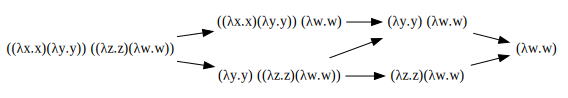

In [9]:
import IHaskell.Display.Graphviz
dot ( "digraph { rankdir=\"LR\"; node [shape=\"none\"]"
  ++"\"((λx.x)(λy.y)) ((λz.z)(λw.w))\" -> \"((λx.x)(λy.y)) (λw.w)\";"
  ++"\"((λx.x)(λy.y)) ((λz.z)(λw.w))\" -> \"(λy.y) ((λz.z)(λw.w))\";"
  ++"\"(λy.y) ((λz.z)(λw.w))\" -> \"(λz.z)(λw.w)\" -> \"(λw.w)\";"
  ++"\"(λy.y) ((λz.z)(λw.w))\" -> \"(λy.y) (λw.w)\" -> \"(λw.w)\";"
  ++"\"((λx.x)(λy.y)) (λw.w)\" -> \"(λy.y) (λw.w)\";"
  ++"}" )

$~$\vspace*{-6em}\newline
방금 전의 셀에서는 Graphviz를 연동하는 하스켈 라이브러리를 이용해
앞서 본문에서 보여준 람다식을 비결정적으로 줄이는 그림을 자동으로 생성하여 출력하고 있다. 
이와 같이 ihaskell-notebook 환경에서는 웹브라우저를 매개로 한
대화형 프로그래밍 환경의 장점 살려 실행 결과를 평이한 텍스트 형태만이
아니라 HTML이나 그래픽 등의 형태로 출력하는 것도 가능하다.

하스켈이 적극적 값계산이 아닌 게으른 값계산에 따라 실행됨을 확인하는 실험을 하나 해보자.
함수 몸체($v$)가 매개변수($x$)에 의존하지 않고 (즉, $x\notin\mathrm{fv}(v)$)
이미 계산이 종료된 값인 함수요약식 $(\lambda x.v)$를
정상적인 값으로 계산이 끝나지 않고 오류가 발생하는 식 $e_\textrm{bad}$에
적용하는 함수적용식 $(\lambda x.v)~e_\textrm{bad}$를 생각해 보라.
함수 인자부터 먼저 계산하는 전략인 적극적 값계산에 따르면 $e_\textrm{bad}$를 먼저 계산하려 하므로 오류가 발생할 것이다.
하지만 함수 적용부터 우선하는 전략인 게으른 값계산에 따르면 끝까지 계산되지 않은 $e_\textrm{bad}$가 함수 매개변수 $x$에
넘어가지만 $v$에 $x$에 의존하지 않으므로 $x$에 넘어간 $e_\textrm{bad}$는 계산할 필요 없이 버려지며 계산 결과값은 $v$가 된다.
실제로 하스켈로 $(\lambda x.v)~e_\textrm{bad}$에 해당하는 프로그램을 작성해 보면 다음과 같이
게으른 계산법을 따름을 확인할 수 있다.

In [10]:
error "bad"                 -- 오류를 발생시키는 error 함수의 실행 예시

: 

In [11]:
(\x -> "good") (error "bad") -- 적극적 값계산에 따르면 오류가 발생해야

"good"

\vspace*{-1.5ex}
# 하스켈에서 변수와 함수의 선언

앞절에서 람다계산법과 하스켈의 관계에 대해 간단히 알아보았다.
여기서는 하스켈에서 람다계산법 이외의 추가적 문법요소 중 가장 기본적인 변수와 함수의 선언에 대해 알아본다.\vspace*{-1.5ex}

## 지역 선언과 전역 선언
지역변수는 let식으로 선언하여 그 안에서만 활용한다.

In [12]:
let x1 = 5 in x1 + x1         -- 지역변수를 선언하여 활용하는 let식

10

In [13]:
let f1 = \x -> x * x in f1 7  -- 지역변수를 함수값을 나타내는 람다식으로 정의

49

In [14]:
let x1 = 5                 -- 여러개의 지역변수가 필요하다면
 in let f1 = \x -> x * x   -- 이렇게 let식을 중첩해서 선언하고
     in f1 x1              -- 활용하면 된다. (들여쓰기 필요!)

25

In [15]:
let x1 = 5                 -- 이렇게 하나의 let식으로 한꺼번에
    f1 = \x -> x * x       -- 여러개의 지역변수를 선언하여
 in f1 x1                  -- 활용 가능하다. (들여쓰기 필요!)

25

In [16]:
f1 x1                -- 지역변수는 범위를 벗어난 곳에서 접근 불가

: 

\noindent
전역변수는 별도의 키워드 없이 등식의 형태로 독립적으로 선언한다.

In [17]:
x2 = 5            -- 전역변수 선언에는 키워드(예약어) 필요없음

In [18]:
x2 + x2           -- 다른 셀의 계산식에서 활용 가능

10

In [19]:
x2 = 5            -- 하나의 셀에서 선언과
x2 + x2           -- 계산식을 섞어 쓸 수도 있다

10

In [20]:
f2 = \x -> x * x  -- 전역변수를 함수값을 나타내는 람다식으로 정의
f2 7

49

In [21]:
f2 x2             -- 전역변수에는 이렇게 다른 셀에서도 접근 가능 

25

또 다른 형태의 `where` 키워드를 이용한 지역 선언이 있다.
`let x = e1 in e`형태의 let식은 그 자체가 식(expression)으로
전체 let식의 값은 곧 `e`를 계산한 값과 같으며, 단지 `e`에서 활용할
지역변수를 그에 앞서 선언했을 따름이다. 식의 계산에 앞서 보조적인 지역 선언을
하는 let과 대조적으로, 선언(declaration)의 뒤에서 보조적인
지역 선언을 하는 키워드가 where이다. 같은 내용의 두 선언을 아래와 같이
하나는 where로 다른 하나는 let식으로 표현해 보았다.

In [22]:
circleArea   =  pi * r^2 where r = 3

circleArea'  =  let r = 3 in pi * r^2

In [23]:
circleArea

circleArea'

28.274333882308138

28.274333882308138

In [24]:
pi  -- 참고로 pi는 표준 라이브러리에서 정의해 놓은 변수다

3.141592653589793

In [25]:
rectArea = x * y
         where     
           x = 3   -- 두 개 이상의 지역 변수도 한꺼번에
           y = 4   -- where로 선언 가능 (들여쓰기 필요!)

In [26]:
rectArea

12

## 간략한 형태의 함수 선언과 함수요약식
람다식으로 선언하는 `f = \x -> e` 대신 `f x = e` 형태로도 함수를 선언할 수 있다.

In [27]:
f2 = \x -> x * x  -- 함수요약식의 매개변수를 등호의 왼쪽으로 보내
f2'   x  = x * x  -- 람다식보다 더 간결한 형태로 똑같은 함수 선언

In [28]:
f2  9
f2' 9

81

81

In [29]:
f3 = \x -> \y -> x + y   -- 두 개 이상 중첩된 람다식으로 선언된 함수를
f3'   x  = \y -> x + y   -- 등호 왼쪽으로 가장 바깥의 매개변수를 옮기고
f3''  x     y  = x + y   -- 또 그 다음 매개변수도 옮겨서 이렇게 선언

In [30]:
f3   4 5
f3'  4 5
f3'' 4 5

9

9

9

\noindent
람다식의 구체적 문법에서 함수 적용은 좌결합(left associative)이며 하스켈에서도 마찬가지다.
즉, 위의 셀에서 연이은 함수적용식 `f3 4 5`는 `(f3 4) 5`와 같은 뜻이다. 그리고 `\x -> \y -> e`는
`\x ->(\y -> e)`와 같은 뜻이며, 이처럼 연달아 겹쳐진 함수요약식을 하스켈에서는
`\x y -> e`로 간략화해 작성할 수 있다.

In [31]:
(\x -> \y -> x + y ) 4 5
(\x ->(\y -> x + y)) 4 5
(\x     y -> x + y ) 4 5

9

9

9

\noindent
참고로, 다른 문법요소가 추가되지 않은 순수한 람다계산법에서는
이름, 함수요약, 함수적용의 세 문법요소를 모두 람다식이라고 한다.
한편, 그 외의 다양한 문법요소를 포함하는 프로그래밍언어의
소스코드에서 \`람다식'이란 변수(이름)나 함수적용식의 형태가 아닌
`\x -> e` 형태의 함수요약식만을 일컫는다.

# 튜플과 패턴
하스켈에서는 순서쌍을 가장 익숙한 표기법대로 표현할 수 있으며,
각 요소가 계산이 완료된 순서쌍은 그 자체로 계산이 완료된 값이다.

In [32]:
(3, 4)                -- 같은 종류의 값으로 이루어진 순서쌍
("hello", 99)         -- 다른 종류의 값으로 이루어진 순서쌍
((3,4), ("hello",99)) -- 순서쌍을 요소로 갖는 중첩된 순서쌍

(3,4)

("hello",99)

((3,4),("hello",99))

\noindent
두 개의 요소로 이루어진 순서쌍을 일반화한 구조가 튜플(tuple)이며,
$n$개의 요소로 이루어진 튜플을 $n$튜플($n$-tuple)이라 한다.
즉, $2$튜플을 순서쌍(pair)이라고도 부르는 것이다.
그 이상의 요소로 이루어진 $3$튜플, $4$튜플 등도 영어로는 트리플, 쿼드러플 등
다른 이름으로 부르기도 하지만 우리말로는 그냥 $n$튜플로 부르는 것이 보통이다.
참고로, 여닫는 괄호를 빈칸 없이 붙여 쓰면 아무런 요소를 갖지 않는 빈 튜플을 나타내는데,
이를 특별히 \`유닛'(unit)이라 부르며 실행 결과를 신경쓰지 않는 함수의 계산값으로 주로 사용된다.

In [33]:
()                   -- 0-tuple (unit)
(1,"two")            -- 2-tuple (pair)
(1,"two",3)          -- 3-tuple (triple)
(1,"two",3,"four")   -- 4-tuple (quadruple)

()

(1,"two")

(1,"two",3)

(1,"two",3,"four")

그런데, $1$튜플($1$-tuple)은 하스켈에 없다. 왜냐하면, 어차피 하나의 요소만으로
이루어진 튜플을 굳이 만들 필요도 없이 그 요소 자체를 사용하면 되기 때문이다.
산술식 `((2 + 3) + 4)`에서 필요없는 괄호을 생략해 `2 + 3 + 4`로 표현할 수 있다.
그러니까 `(e)`는 1튜플이 아니라 그냥 `e`에 괄호를 둘렀을 뿐이다.

In [34]:
(9)
9
((2 + 3) + 4)
2 + 3 + 4

9

9

9

9

튜플 중에서도 가장 자주 활용되는 순서쌍의 첫째와 둘째 요소를 선택하는
함수 `fst`와 `snd`를 하스켈 표준 라이브러리에서 기본적으로 제공한다.

In [35]:
p1 = (3,4) 

fst p1
snd p1

3

4

In [36]:
x1 = fst p1  -- 순서쌍의 요소를 뽑아 하나씩
y1 = snd p1  -- 하나씩 변수들로 선언해 놓고

x1 + y1      -- 필요한 곳에 활용

7

변수 선언을 일반화한 패턴(pattern)으로
순서쌍과 같은 구조의 여러 요소에 대해 한꺼번에 여러 변수를 선언할 수 있다.
선언의 왼쪽에 순서쌍 패턴, 즉 변수 대신 순서쌍의 구조를 나타내는 괄호와 쉼표를 표시하고
각 요소들의 위치에 새로운 변수 이름들을 작성하면 된다. 뒤집어 말하자면
지금까지 살펴본 선언에서 변수란 구조 전체를 대표하는 가장 단순한 패턴으로 이해할 수 있다.

In [37]:
(x2,y2) = p1  -- 순서쌍 p1의 첫째,둘째 요소가 x2,y2로 선언됨

In [38]:
p1
x1
x2

(3,4)

3

3

\noindent
필요하다면 `@`기호로 전체 구조를 대표하는 변수도 각각의 요소에 대한 변수와 함께 한꺼번에 선언 가능하다

In [39]:
p3@(x3,y3) = p1 -- 순서쌍 p1 전체와 첫째,둘째 요소가 p3와 x3,y3로 선언됨

In [40]:
p1
p3
x3
y3

(3,4)

(3,4)

3

4

전역 선언 외에도 지역 선언이나 함수 매개변수 등 변수가 유효범위에 묶이는 곳에 일반적으로 패턴이 올 수 있다.

In [41]:
p1
(\(x,y) -> x) p1
(\(x,y) -> y) p1

(3,4)

3

4

\noindent
순서쌍의 요소를 선택하는 표준 라이브러리 함수 `fst`와 `snd`도 사실은 패턴으로 작성되어 있다.
마찬가지 역할을 하는 `myfst`와 `mysnd`를 다음과 같이 선언하여 활용할 수 있다.

In [42]:
myfst = \(x,y) -> x
mysnd    (x,y) =  y

myfst p1
mysnd p1

3

4

위의 `myfst` 선언에서 `y`와 `mysnd` 선언에서 `x`는 쓰이지 않는다.
이렇게 패턴에서 쓰이지 않는 요소를 와일드카드 패턴(`_`)으로 표시하면
코드의 가독성을 높일 수 있다.

In [43]:
myfst = \(x,_) -> x  -- 선언되기만 하고 쓰이지 않는 변수 대신
mysnd    (_,y) =  y  -- 와일드카드 패턴을 사용하면 좋다

myfst p1
mysnd p1

3

4

\noindent
인자를 무시하고 0만 돌려주는 함수도 와일드카드 패턴으로 선언할 수 있다.

In [44]:
f0 _ = 0   -- 패턴 전체를 와일드카드 패턴으로 작성하는 것도 가능하다

f0 12
f0 999

0

0

여기서 다룬 튜플에 대한 패턴 외에도 정수 등의 기본타입이나
리스트 및 다른 사용자 정의 데이터 구조에 대한 패턴도 하스켈에 지원한다.
패턴에 대한 추가적인 내용은 그러한 내용을 활용하는 예제를 다루면서
자연스럽게 친숙해지기로 하자. 좀더 차근차근 하스켈의 문법요소를
살펴보고 싶다면 하스켈 프로그래밍을 주제로 하는 교재\cite{Hutton2016pih2nd}를 참고하라.

# 타입있는 람다계산법과 하스켈
지금까지 하스켈 소스코드에서 타입이 단 한 번도 등장하지 않았고
에러 메시지만 타입에 대한 내용이 조금 있었다. 그렇다고 해서 하스켈이
실행 중에만 타입을 따지는 동적 타입 언어는 결코 아니다. 사실 하스켈은 학계의
연구 결과를 상당히 적극적으로 반영한 매우 정교한 정적 타입 시스템이 돋보이는 언어다.
그럼에도 하스켈 소스코드에서 타입에 정보가 번잡스럽게 드러나지 않는 까닭은
프로그래머가 타입 정보를 자세히 알려주지 않아도 컴파일러가 자동으로 타입을 유추하기 때문이다.
참고로, 타입 유추(type inferene)에 관해 선구적인 업적으로 유명한 학자가
앞서 ML의 창시자로 소개한 로빈 밀너(Robin Milner)로, ML과 Haskell 등
많은 함수형 언어의 타입 시스템이 그의 연구\cite{Milner78}를 바탕으로 한다.
여기서는 타입 유추보다는 타입있는 람다계산법과 하스켈을 관련지어 설명한다.

알론조 처치는 그가 창시한 람다계산법을 논리체계와 연관지으려 할 때
발생하는 모순(paradox)을 피하고자 단순한 타입을 추가한 람다계산법인
\index{단순타입 람다계산법|see{simply-typed $\lambda$-calculus}}\index{simply-typed $\lambda$-calculus|see{단순타입 람다계산법}}\index{STLC|see{simply-typed $\lambda$-calculus}}\index{STLC|see{단순타입 람다계산법}}
단순타입 람다계산법\cite{Church1940stlc}을 고안하였고,
\index{람다계산법!타입있는 람다계산법!단순타입 람다계산법}\index{$\lambda$-calculus!typed $\lambda$-calculus!simply-typed $\lambda$-calculus}
그 이후로 더 다채로운 기능의 타입을 갖춘 람다계산법이 연구되었다.
이렇게 타입이 첨가된 부류의 람다계산법을
\index{타입있는 람다계산법|see{typed $\lambda$-calculus}}\index{typed $\lambda$-calculus|see{타입있는 람다계산법}}
타입있는 람다계산법(typed $\lambda$-calculus)이라
\index{람다계산법!타입있는 람다계산법}\index{$\lambda$-calculus!typed $\lambda$-calculus}
부르며,
그에 대비되는 타입이 추가되기 전에 원래의 람다계산법을
\index{타입없는 람다계산법}\index{untyped $\lambda$-calculus}
타입없는 람다계산법(untyped $\lambda$-calculus)이라 부른다.

문법구조\vspace{-4.5ex}
\begin{align*}
\qquad
t \in B & \quad\text{\small(기본타입)} &
\tau\in T ~::= ~& t ~\mid~ \tau \to \tau
\\
c \in C & \quad\text{\small(기본상수)} &
e\in E ~::=~ & c ~\mid~ x ~\mid~ \lambda x{\,:\,}\tau.\,e ~\mid~ e~e
\end{align*}
타입규칙 $\qquad
\Delta ~::=~ c{\,:\,}\tau,\Delta ~\mid~ \bm{\cdot}
\qquad\qquad\qquad
\Gamma ~::=~ x{\,:\,}\tau,\Gamma ~\mid~ \bm{\cdot}$
$$
{\scriptstyle(\textsc{Con})}
\frac{~ ~}{~ \Gamma \vdash c:\tau ~}
({\scriptstyle c{\,:\,}\tau\;\in\,\Delta})
\qquad\qquad
{\scriptstyle(\textsc{Var})}
\frac{~ ~}{~ \Gamma \vdash x:\tau ~}
({\scriptstyle x{\,:\,}\tau\;\in\,\Gamma})
$$
\vspace*{-.5ex}
$$
{\scriptstyle(\textsc{Abs})}
\frac{~ x:\tau_2,\Gamma \vdash e:\tau ~}{~ \Gamma \vdash \lambda x{\,:\,}\tau_2.\,e : \tau_2\to\tau ~}
\qquad
{\scriptstyle(\textsc{App})}
\frac{~ \Gamma \vdash e_1:\tau_2\to\tau ~\quad~ \Gamma \vdash e_2:\tau_2 ~}{~ \Gamma \vdash e_1\;e_2 : \tau ~}
$$

처치가 고안한 단순타입 람다계산법(STLC, 그림 \ref{fig:STLC})에는
원래 람다식의 세 문법요소 외에 기본상수(c)가 또 한 가지 추가된다.
또한, 타입없는 람다계산법에서 함수요약식($\lambda x.e$)의 매개변수($x$) 옆에
콜론($:$)기호로 타입 표기가 추가된 $\lambda x{\,:\,}\tau.\,e$를 STLC의 함수요약식 형태로 삼는데,
여기서 $x{\,:\,}\tau$는 함수 매개변수 $x$에 넘어오는 인자의 타입이 $\tau$여야 함을 나타낸다.
참고로, $e:\tau$는 타입 이론에서 식 $e$의 타입이 $\tau$임을 뜻하는 통상적인 표기다.
물론 이런 타입을 표기하기 위해서는 타입에 대한 문법구조가 정의되어야 한다.
STLC의 타입은 기본타입($t$)이거나 함수타입($\tau\to\tau$)이다.

\index{타입규칙|see{typing rule}}\index{typing rule|see{타입규칙}}
STLC의 타입규칙은 $\Gamma \vdash e:\tau$ 형태의
\index{판단|see{judgement}}\index{judgement|see{판단}}
판단(judgement)을 증명하기 위한
\index{추론규칙}\index{inference rule}
추론규칙의 형식으로 작성되어 있다.
$\Gamma$를 지역적으로 가정할 때 $e:\tau$를 증명할 수 있다는 판단을 $\Gamma \vdash e:\tau$로 나타낸다.
상수나 이름과 타입을 관련짓는 가정으로 이루어진 $\Delta$나 $\Gamma$와 같은 구조를
\index{타입문맥|see{typing context}}\index{typing context|see{타입문맥}}
타입문맥(typing context)
혹은
\index{타입환경|see{typing environment}}\index{typing environment|see{타입환경}}
타입환경(typing environment)이라고 부르며,
타입과 관련된 내용만을 다루는 혼란의 여지가 없는 맥락에서는 그냥 \`문맥' 혹은 \`환경'이라고 줄여서 부른다.
기본상수($c$)의 타입에 관한 \textsc{\small Con}규칙은 미리 주어지는 전역환경 $\Delta$에 따라
지역환경 $\Gamma$과 무관하게 기본상수 $c$의 타입이 판단됨을 뜻한다.
이름($x$)의 타입에 관한 \textsc{\small Var}규칙은
지역환경 $\Gamma$에 따라 이름 $x$의 타입이 판단됨을 뜻한다.
함수요약식($\lambda x{\,:\,}\tau_2.\,e$)의 타입에 관한 \textsc{\small Abs}규칙은
함수 매개변수의 타입을 추가로 가정한 환경 $x:\tau_2,\Gamma$에서 함수 몸체 $e$의 타입을 $\tau$로 판단할 수 있다면
함수요약식 $\lambda x{\,:\,}\tau_2.\,e$의 타입을 $\tau_2\to\tau$로 판단할 수 있음을 뜻한다.
함수적용식($e_1\;e_2$)의 타입에 관한 \textsc{\small App}규칙은 같은 환경 $\Gamma$에 따라
왼쪽 $e_1$의 타입은 $\tau_2\to\tau$으로 오른쪽 $e_2$의 타입은 $\tau_2$으로,
즉 $e_1$의 함수타입에서 정의역(화살표 왼편)과 $e_2$의 타입이 일치하도록, 판단할 수 있다면
함수적용식 $e_1\;e_2$의 타입을 $e_1$의 함수타입에서 공역(화살표 오른편)에 해당하는 $\tau$로 판단할 수 있음을 뜻한다.

기본타입의 집합($B$), 기본상수의 집합($C$), 전역환경($\Delta$)를 설정함으로써 구체적인 버전의 STLC가 정의된다.
예를 들어 $B = \{\,\texttt{bool}\,\}$, $C = \{\,c_\texttt{F},\;c_\texttt{T},\;c_\neg,\;c_\land\,\}$,
$\Delta = c_\texttt{F}{:\,}\texttt{bool}, \, c_\texttt{T}{:\,}\texttt{bool}, \, c_\neg{:\,}\texttt{bool}{\to\,}\texttt{bool}, \,
           c_\land{:\,}\texttt{bool}{\to\,}\texttt{bool}{\to\,}\texttt{bool}, \, \bm{\cdot}$로 설정하면
진리값 및 관련 연산인 논리부정과 논리곱을 다루는 버전의 STLC 문법구조와 타입규칙이 그림 \ref{fig:STLC}의 틀에 따라 정의된다.
그런데 지금까지 STLC의 설명에서 빠진 부분이 하나 있으니 그것은 바로 의미구조이다. STLC는 정적 타입 언어와 같이 실행 전에
타입규칙으로 타입검사가 가능하다. 따라서 STLC의 의미구조는 기본적으로 타입없는 람다계산법(그림 \ref{fig:UTLC})과 같지만,
한 가지 더 추가된 문법요소인 기본상수($c$)를 어떻게 실행할지에 대한 규칙을 설정에 맞게 아래와 같이 추가로 정의할 필요가 있다.
이런 추가적인 규칙을 $\delta$규칙이라고도 부른다.\vspace*{-1.5ex}

$c_\neg  ~ c_\texttt{F} \longmapsto c_\texttt{T}     \qquad
 c_\neg  ~ c_\texttt{T} \longmapsto c_\texttt{F}     \qquad~
 c_\land ~ c_\texttt{F} ~ e \longmapsto c_\texttt{F} \qquad
 c_\land ~ c_\texttt{T} ~ e \longmapsto e$

하스켈에서 아래와 같이 사용자 정의 데이터 타입과 관련 연산을 함수로 선언하는 것이
STLC에서 $B$, $C$, $\Delta$를 설정하고 $\delta$규칙을 정의하는 것에 해당한다.

In [45]:
-- 기본타입 Tbool과 기본상수 CF,CB가 선언됨 
data Tbool = CF | CT    deriving (Eq, Ord, Show)

-- 기본상수 cNeg와 관련 δ규칙 선언됨
cNeg CF = CT
cNeg CT = CF

-- 기본상수 cAnd와 관련 δ규칙 선언됨
cAnd CF e = CF
cAnd CT e = e

In [46]:
-- Δ는 타입 유추를 통해 위 셀의 선언으로부터 자동으로 설정됨
:type CF
:type CT
:type cNeg
:type cAnd

CF :: Tbool

CT :: Tbool

cNeg :: Tbool -> Tbool

cAnd :: Tbool -> Tbool -> Tbool

\noindent
참고로, 하스켈에서 데이터 타입 및 생성자의 이름은 `Tbool` 및 `CF`, `CT`처럼 대문자로 시작하며,
함수나 변수의 이름은 `cNeg`, `cAnd`나 `e`처럼 소문자로 시작한다.
실제로 하스켈 표준 라이브러리에서는, 여기서 설명을 위해 작성한 `Tbool` 코드와 마찬가지 방법으로,
하스켈의 표준적인 진리값 타입인 `Bool` 및 생성자 `False`, `True`, 그리고 논리부정(`not`)과
논리곱(`&&`) 등 관련 연산을 선언하여 제공한다.

하스켈 컴파일러에게 대화식으로 요청하거나 환경설정을 하는 콜론(:)으로 시작하는 명령들이 있다.
`:type <식>`으로 식의 타입을 유추해 달라고 요청하고 
`:info <이름>`으로 타입, 생성자, 함수, 변수 등의 정보를 알려달라고 요청한다.\vspace*{-.75ex}

In [47]:
:info Bool

type Bool :: *
data Bool = False | True
  	-- Defined in ‘GHC.Types’
instance Bounded Bool -- Defined in ‘GHC.Enum’
instance Enum Bool -- Defined in ‘GHC.Enum’
instance Eq Bool -- Defined in ‘GHC.Classes’
instance Ord Bool -- Defined in ‘GHC.Classes’
instance Show Bool -- Defined in ‘GHC.Show’
instance Read Bool -- Defined in ‘GHC.Read’

In [48]:
:type False
:type True
:type not
:type (&&)

False :: Bool

True :: Bool

not :: Bool -> Bool

(&&) :: Bool -> Bool -> Bool

In [49]:
not False
not True

True

False

In [50]:
False && False
False && True
True  && False
True  && True

False

False

False

True

$~$

하스켈 컴파일러에서 나오는 메시지를 유심히 봤으면 이미 알아차렸을텐데,
타입 이론에서 통상적인 $e:\tau$ 표기와 비슷하지만 약간 다르게 콜론(`:`)을
두 번 써서 하스켈에서는 `e :: T` 형태로 표현한다.
컴파일러 메시지만이 아니라 코드를 작성할 때도 같은 표현을 쓸 수 있다.
아래에서 `read`의 예처럼 식의 타입을 표시하거나,
`betweenAtoZ`의 예처럼 선언되는 함수나 변수의 타입을 표시하거나,
람다식의 예처럼 패턴의 타입을 표시할 수도 있다.

In [51]:
:type read -- 문자열(String)을 여러 타입(a)으로 변환

read :: forall a. Read a => String -> a

In [52]:
read "123" :: Int     -- Int로 변환
read "123" :: Double  -- Double로 변환

123

123.0

In [53]:
betweenAtoZ :: Char -> Bool
betweenAtoZ c = 'A' <= c && c <= 'Z'

In [54]:
betweenAtoZ 'B'
betweenAtoZ '3'

True

False

In [55]:
:type \x -> x  -- 상당히 일반적인 타입으로 유추된다

\x -> x :: forall p. p -> p

In [56]:
(\x -> x) 3        -- Int 타입 인자도 넘길 수 있고
(\x -> x) "hello"  -- String 타입 인자도 넘길 수 있다

3

"hello"

In [57]:
(\(x :: Int) -> x) 3    -- 타입있는 람다계산법처럼 함수 매개변수에 타입 표시

3

In [58]:
(\(x :: Int) -> x) "hello"  -- 타입 표시로 Int만 받는 함수가 되므로 오류

: 

위의 `read`나 `\x -> x`의 경우처럼,
하스켈은 STLC보다 훨씬 다양한 형태와 기능을 갖춘 타입을 다루고 있다.
이러한 내용을 여기에서 한꺼번에 다 소개하지 않지만,
가장 기본적인 형태의 타입을 다루는 STLC와 하스켈을 관련지어 이해할 수 있다면
더 다양한 형태의 타입을 다루는 타입있는 람다계산법을 하스켈과 관련지어 이해하는 데 도움이 될 것이다.

# 함수 매개변수는 딱 한 개면 충분
람다계산법 그리고 람다계산법을 기반으로 한 하스켈에서 원론적으로 함수 매개변수는 항상 한 개이다.
람다계산법에서 $\lambda x.\lambda y.e$, 즉 $\lambda x.(\lambda y.e)$는 두 개의 인자에 한꺼번에 적용하는 함수가 아니라,
한 개의 인자 $e_1$에 적용하면 결과값으로 함수인 $\lambda y.\{x{\,\mapsto}e_1\}e$가 계산되고 ($x\neq y$, $y\notin \mathrm{fv}(e_1)$라고 가정),
그렇게 계산된 $\lambda y.\{x{\mapsto}e_1\}e$를 또 한 개의 인자 $e_2$에 적용하면 결과값으로 $\{y{\,\mapsto}e_2\}(\{x{\,\mapsto}e_1\}e)$가 계산되는 함수인 것이다.

$((\lambda x.(\lambda y.e))~e_1)~e_2 \longmapsto
(\lambda y.\{x{\,\mapsto}e_1\}e)~e_2 \longmapsto
\{y{\,\mapsto}e_2\}(\{x{\,\mapsto}e_1\}e)$

이를 염두에 두고, 나중에 나타나는 정수(`y`)에서 먼저 나타나는 정수(`x`)를 뺀 값(`y - x`)을 계산하는
비슷한 두 하스켈 함수 `fu`와 `fc`를 비교해 보자. 참고로, 수학에서 $x\in A$와 $y\in B$로 이루어진
순서쌍 $(x,y)\in A\times B$ 혹은 타입 이론의 표기로는 $x:A$와 $y:B$로 이루어진 순서쌍 $(x,y):A\times B$를,
하스켈에서는 `x::A`와 `y::B`로 이루어진 순서쌍 `(x,y)::(A,B)`로 표기한다.
즉, 수학이나 타입 이론에서 곱집합이나 곱타입 $A\times B$는 하스켈 순서쌍 타입 `(A,B)`에 해당한다.

In [59]:
fu :: (Int,Int) -> Int    -- 순서쌍 하나를 받으면 정수값이 결과
fu (x,y) = y - x

In [60]:
fu (3,7) -- fu는 이렇게만 사용

4

In [61]:
fc :: Int -> (Int -> Int) -- 정수 하나를 받으면 (Int - >Int)함수값이 결과
fc  x y  = y - x

In [62]:
fc 3 7 -- 이렇게 인자를 하나씩 연달아 두 번에 걸쳐 적용하며 활용할 수도

4

In [63]:
sub3 = fc 3  -- 한 번만 적용해 계산된 함수값을 sub3로 선언해 놓고
sub3 7  -- 7보다 3작은 수 계산, 이렇게도 활용하고
sub3 5  -- 5보다 3작은 수 계산, 요렇게도 활용할 수도

4

2

\noindent
참고로, `fu`와 `fc`를 아래와 같이 람다식으로 바꿔서 선언해 보면 오히려 타입을 이해하기 쉬워지는 측면도 있다.
두 번 연이은 함수적용식 $e~e_1~e_2$는 왼쪽에서부터 괄호로 묶은 $(e~e_1)~e_2$와 같으므로,
연이어 두 번 인자를 받는 함수 타입 $t_1 \to t_2 \to t$는 오른쪽에서부터 괄호로 묶은 $t_1 \to (t_2 \to t)$와 같은 타입이다.
따라서 `fc`의 타입을 괄호를 생략한 `Int -> Int -> Int`라고 해도 괜찮다.

In [64]:
fu :: (Int,Int) -> Int
fu = \( x , y ) -> y - x
fc :: Int -> (Int -> Int  )
fc = \x   -> (\y  -> y - x)

\index{커리하기|see{currying}}\index{currying|see{커리하기}}
한 요소씩 여러 번에 걸쳐 인자를 적용하는 `fc`같은 함수를 커리된(curried) 함수,
순서쌍으로 한꺼번에 묶인 인자에 적용하는 `fu`같은 함수를 커리되지 않은(uncurried) 함수라고 부른다.
이는 하스켈 커리(Haskell Curry)의 성씨인 커리(Curry)를 따라 만들어진 용어다.
하스켈에서는 의미상 순서쌍이 자연스러운 경우를 제외하면 일반적으로 커리된 함수 형태의 선언을 장려한다.
람다계산법과 마찬가지로 괄호 등 함수적용을 나타내는 별도의 기호 없이
인자를 한 번에 하나씩만 넘기는 함수적용 문법을 하스켈도 따르고 있어 커리된 함수를 활용하기 편리하다.

그런데 커리된 함수를 경우에 따라 커리되지 않은 방식으로 한꺼번에 묶인 순서쌍에 적용하고 싶거나,
반대로 커리되지 않은 함수를 커리된 함수처럼 각각의 요소를 하나씩 두 번 적용한다던가
혹은 순서쌍의 두 요소 중 하나만 적용해 활용하고 싶은 경우가 생길 수도 있다.
그래서 하스켈 표준 라이브러리에서는 `fu`함수를 `fc`처럼 활용할 수 있도록 바꿔주는 `curry`와,
또 반대로 `fc`함수를 `fu`처럼 활용할 수 있도록 바꿔주는 `uncrry`라는 고차함수(higher-order function)을 제공한다.
고차함수에 대해서는 다음 장에서 다시 설명하기로 하자.

In [65]:
:type curry    -- ((a, b) -> c) -> (a -> b -> c)
:type uncurry  -- (a -> b -> c) -> ((a, b) -> c)

curry :: forall a b c. ((a, b) -> c) -> a -> b -> c

uncurry :: forall a b c. (a -> b -> c) -> (a, b) -> c

In [66]:
fu (3,7)
(curry fu) 3 7     -- fu를 fc처럼 하나씩 두 번 호출하도록 바꿔줌

4

4

In [67]:
fc 3 7
(uncurry fc) (3,7)  -- fc를 fu처럼 순서쌍으로 호출할 수 있게 바꿔줌

4

4

\section*{요점정리}
* 게으른 계산법(lazy evaluation)을 따르는 정적 타입
  함수형 언어를 주제로 연구하는 학계의 표준적인 언어를
  만들고자 모인 위원회가 하스켈(Haskell) 프로그래밍언어의 기원이다.
* 함수형 언어의 역사에서 중요한 세 언어인 LISP, ML, Haskell의 대표적인 특징은,
  LISP은 최초의 함수형 언어, ML은 타입 유추를 지원하는 정적 타입 시스템을 갖춘
  함수형 언어, Haskell은 게으른 계산법에 따르는 순수 함수형 언어라는 점이다. 
* 람다계산법에서 줄임(reduction)은 함수 안쪽의 함수 몸체를 포함하여 가능한 모든
  맥락(context)에서 핵심적인 계산 규칙을 적용하며, 작은걸음 의미구조로 표현했을 때
  여러 갈래로 계산과정이 진행가능한 비결정적인 의미구조가 되는 것이 자연스럽다.
* 람다계산법에 기반한 프로그래밍언어의 의미구조에 주로 활용되는 값계산(evaluation)은
  함수를 계산이 완료된 값으로 보는 등 특정 맥락(context)에서만 결정적으로
  핵심 계산 규칙을 적용한다.
* 줄임이 끝나는 표준형(normal form)에 해당하지 않는 함수요약식 등
  더 많은 형태의 식을 값계산(evaluation)이 끝난 값(value)로 본다.
* 적극적 값계산(eager evaluation)은 함수 인자의 계산부터,
  게으른 값계산(lazy evaluation)은 $\beta$규칙에 따른 함수 적용부터 우선한다.
* 하스켈에서 전역 선언은 키워드 없는 등식 형태로 한다.
  지역 선언은 식에 앞서 보조적인 지역 변수를 선언는 let식이나
  선언의 뒤에서 보조적인 지역 변수를 선언하는 where 키워드를 활용한다.
* 람다계산법에서 람다식의 세 가지 문법요소 중 $\lambda x.e$ 형태의 함수적용식만을
  프로그래밍언어에서는 \`람다식'이라고 부른다.
* 변수 선언을 일반화한 패턴(pattern)으로 하스켈 데이터 구조의 여러 부분을 한꺼번에 여러 개의 변수로 선언할 수 있다.
* 타입있는 람다계산법은 원래의 람다계산법에 타입을 추가하여 타입을 검사할 수 있는 타입규칙을 정의한
  부류의 람다계산법을 통칭한다.
* 가장 기본적인 타입있는 람다계산법인 단순타입 람다계산법(STLC)에서 타입은 기본타입 또는 함수타입의 형태를 갖는다.
* 기본타입의 집합($B$), 기본상수의 집합($C$), 전역 타입환경($\Delta$)을 설정하고
  의미구조에 기본상수의 계산을 다루는 $\delta$규칙을 정의함으로써 구체적인 버전의 STLC가 하나 정의된다. 
* 하스켈을 타입있는 람다계산법인 STLC와 연관지어 이해하자면, 하스켈에서 데이터 타입과 그 생성자 및
  관련 연산을 선언이 STLC에서 기본타입 및 기본상수를 설정하고 $\delta$규칙을 정의하는 것에 해당하며
  전역 타입환경 내용의 대부분이 타입 유추에 의해 자동으로 설정될 수 있다.
* 타입 이론에서 $e:\tau$와 비슷하게 하스켈에서는 타입 정보를 `e :: T` 형태로 표시한다
* 람다계산법과 마찬가지로 하스켈에서도 함수 매개변수는 항상 한 개이며, 한 개씩 여러 번에 걸쳐
  인자를 커리된(curried) 함수 또는 한꺼번에 튜플로 묶인 인자에 적용하는 않은(uncurried) 함수의
  두 가지 다른 형태로 결과적으로 같은 계산을 하는 함수를 정의할 수 있다.

$~$
\section*{연습문제}
1. 이 장에서 예시로 든 진리값을 다루는 버전의 STLC에 논리합을 나타내는 기본상수 $c_\lor$를 추가해 보라. 
1. 위 문제의 논리합까지 추가된 버전의 STLC에 맞도록 \texttt{[45]}번 셀의 하스켈 코드도 수정해 보라.
1. 다음의 타입없는 람다계산법의 람다식을 STLC의 타입규칙에 맞게 함수적용식에 타입 표시를 추가한 STLC의 람다식 형태로 바꿔보라.
   참고로 하나의 타입없는 람다식에 해당하는 STLC 람다식은 딱 하나로 정해져 있지 않으며,
   타입 표시만 다른 여러 개의 STLC 람다식들로 바꿀 수 있으므로 그 중 적절히 간단한 것으로 하면 된다.
   그런데 아래 중 일부는 STLC의 타입 규칙에 맞는 람다식으로 바꿀 수 없다. 바꿀 없다고 판단되는 것들은 왜 불가능한지도 설명해 보라.
   STLC의 설정은 단순하게 $B=\{o\}$, $C=\{c_o\}$, $\Delta=\{c_o{\,:\,}o\}$이며 추가적인 $\delta$규칙은 없다고 하자.
   - $(\lambda x.\, x)\,(\lambda x.\, x)$
   - $(\lambda y.\, y ~ (\lambda x.\, x))$
   - $(\lambda y.\, y ~ y)$
   - $(\lambda y.\, (\lambda x.\, x) ~ y)$
   - $(\lambda x.(\lambda y.\, y ~ x))$


\section*{탐구과제}
1. 대략 20년 간격으로 나타난 함수형 언어들인 LISP, ML, Haskell이
   책에서 간략히 소개한 것 외에 또 어떤 공통점 및 차이점이 있는지 조사해 보라.
1. 이 장에서 소개한 모든 맥락에서의 비결정적 줄임(reduction)에 대비되는
   특정 맥락에서만 계산을 진행하는 줄임 전략인
   표준순서(normal order) 줄임 및 적용순서(applicative order) 줄임에 대해 알아보고,
   이 장에서 소개한 값계산 전략인 게으른 값계산 및 적극적 값계산과 비교해 보라.
1. STLC 말고 다른 타입있는 람다계산법은 어떤 것들이 있는지 알아보라.
1. 알론조 처치가 고안한 처치 방식(Church-style) 타입있는 람다계산법 외에도
   하스켈 커리의 이름을 딴 커리 방식(Curry-style) 타입있는 람다계산법도 있다.
   커리 방식이 처치 방식과 어떻게 다른지 알아보라.